<a href="https://colab.research.google.com/github/Ferrariagustinpablo/Data-Analytics-in-R/blob/main/Data_Manipulation_with_dplyr_(2)_using_US_census_and_babynames_dataset_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [1]:
# Load
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [6]:
counties = readRDS("/content/counties.rds")
str(counties)

spec_tbl_df [3,138 × 40] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ census_id         : chr [1:3138] "1001" "1003" "1005" "1007" ...
 $ state             : chr [1:3138] "Alabama" "Alabama" "Alabama" "Alabama" ...
 $ county            : chr [1:3138] "Autauga" "Baldwin" "Barbour" "Bibb" ...
 $ region            : chr [1:3138] "South" "South" "South" "South" ...
 $ metro             : chr [1:3138] "Metro" "Metro" "Nonmetro" "Metro" ...
 $ population        : num [1:3138] 55221 195121 26932 22604 57710 ...
 $ men               : num [1:3138] 26745 95314 14497 12073 28512 ...
 $ women             : num [1:3138] 28476 99807 12435 10531 29198 ...
 $ hispanic          : num [1:3138] 2.6 4.5 4.6 2.2 8.6 4.4 1.2 3.5 0.4 1.5 ...
 $ white             : num [1:3138] 75.8 83.1 46.2 74.5 87.9 22.2 53.3 73 57.3 91.7 ...
 $ black             : num [1:3138] 18.5 9.5 46.7 21.4 1.5 70.7 43.8 20.3 40.3 4.8 ...
 $ native            : num [1:3138] 0.4 0.6 0.2 0.4 0.3 1.2 0.1 0.2 0.2 0.6 ...
 $ asian         

# Select(starts_with() contains(), ends_with(), last_col()) 

In [7]:
# Only select some rows
counties_selected <- counties %>%
  select(state,last_col(), region, county, population, starts_with('income'), self_employed, unemployment, walk)

head(counties_selected)

state,land_area,region,county,population,income,income_err,income_per_cap,income_per_cap_err,self_employed,unemployment,walk
<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alabama,594.44,South,Autauga,55221,51281,2391,24974,1080,5.5,7.6,0.5
Alabama,1589.78,South,Baldwin,195121,50254,1263,27317,711,5.8,7.5,1.0
Alabama,884.88,South,Barbour,26932,32964,2973,16824,798,7.3,17.6,1.8
Alabama,622.58,South,Bibb,22604,38678,3995,18431,1618,6.7,8.3,0.6
Alabama,644.78,South,Blount,57710,45813,3141,20532,708,4.2,7.7,0.9
Alabama,622.81,South,Bullock,10678,31938,5884,17580,2055,5.4,18.0,5.0


# select(-variable)

In [8]:
# Remove income_per_cap_err from dataset
counties_selected %>%
  select(- income_per_cap_err, -income_err) %>%
  head(1)

state,land_area,region,county,population,income,income_per_cap,self_employed,unemployment,walk
<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alabama,594.44,South,Autauga,55221,51281,24974,5.5,7.6,0.5


# Select consecutive columns using :

In [9]:
# Select consecutive variables 
counties %>%
    select(state, region, county, population, professional:production) %>%
    arrange(desc(service)) %>%
    head(2)

state,region,county,population,professional,service,office,construction,production
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mississippi,South,Tunica,10477,23.9,36.6,21.5,3.5,14.5
Texas,South,Kinney,3577,30.0,36.5,11.6,20.5,1.3


# Rename variables


## with rename()

In [10]:
# Rename unemployment for unemployment_rate and land_area
counties_selected %>%
  rename(unemployment_rate = unemployment, l_area_squared_miles = land_area) %>%
  head(1)

state,l_area_squared_miles,region,county,population,income,income_err,income_per_cap,income_per_cap_err,self_employed,unemployment_rate,walk
<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alabama,594.44,South,Autauga,55221,51281,2391,24974,1080,5.5,7.6,0.5


In [11]:
# Rename the n column to num_counties
counties %>%
  count(state, sort=T) %>%
  rename(num_counties = n) %>%
  head(2)

state,num_counties
<chr>,<int>
Texas,253
Georgia,159


## rename inside select

In [12]:
# Only select some rows
counties %>%
  select(state,last_col(), region, county, pop = population) %>%
  head(2)

state,land_area,region,county,pop
<chr>,<dbl>,<chr>,<chr>,<dbl>
Alabama,594.44,South,Autauga,55221
Alabama,1589.78,South,Baldwin,195121


# transmute(), a combination of select and mutate

In [13]:
counties %>%
  transmute(state, state, unemployed = population*unemployment/100) %>%
  tail(4)

state,unemployed
<chr>,<dbl>
Wyoming,580.086
Wyoming,920.920
Wyoming,571.200
Wyoming,371.904


# Exercises 1

## transmuting, filtering and sort with arrange

Keep only the state, county, and population columns, and add a new column, density, that contains the population per land_area.
Filter for only counties with a population greater than one million.
Sort the table in ascending order of density.

In [14]:
counties %>%
  # Keep the state, county, and populations columns, and add a density column
  transmute(state, county, population, density = population / land_area) %>%
  # Filter for counties with a population greater than one million 
  filter(population > 1000000) %>%
  # Sort density in ascending order 
  arrange(density) %>%
  head(3)

state,county,population,density
<chr>,<chr>,<dbl>,<dbl>
California,San Bernardino,2094769,104.4411
Nevada,Clark,2035572,257.9472
California,Riverside,2298032,318.8841


# Filtering a vector in a column

In [16]:
#  Link: https://assets.datacamp.com/production/repositories/4984/datasets/a924ac5d86adba2e934d489cb9db446236f62b2c/babynames.rds

babynames = readRDS("/content/babynames.rds")

# Filter with %in%
selected_names = babynames %>%
  filter(name %in% c("Amy", "Abraham", "Steven", "Abbott"))

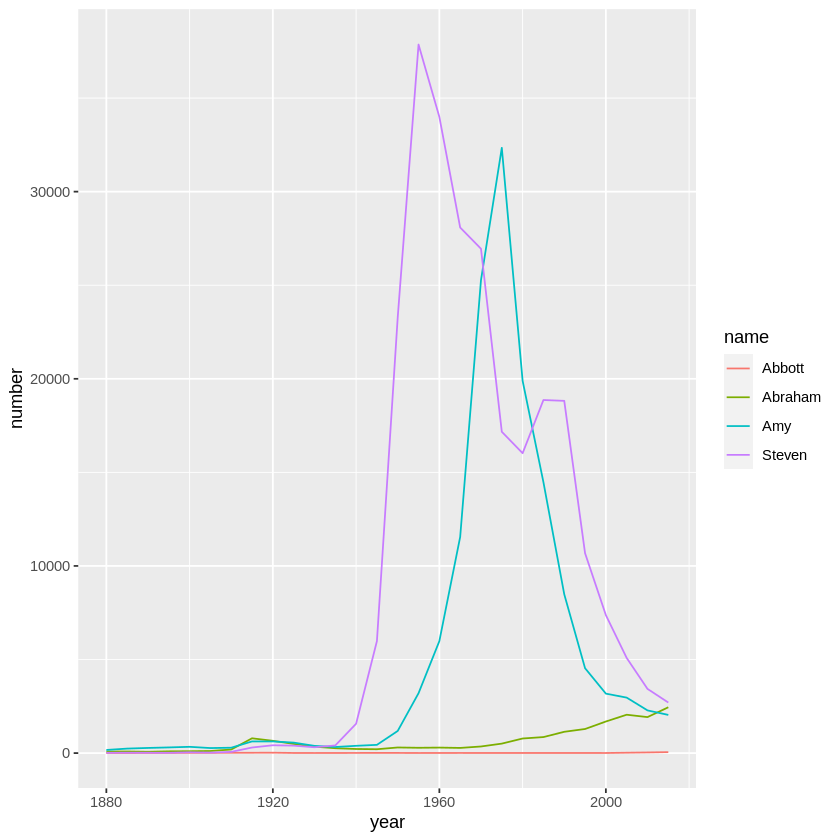

In [17]:
# Plot selected names using a different color for each name
ggplot(selected_names, aes(x = year, y = number, color = name)) +
  geom_line()

## Find the most common name in each year 

In [18]:
# Find the most common name in each year
babynames %>%
  group_by(year) %>%
  top_n(1, number) %>%
  head(5)

year,name,number
<dbl>,<chr>,<int>
1880,John,9701
1885,Mary,9166
1890,Mary,12113
1895,Mary,13493
1900,Mary,16781


# Finding the year each name is most common

In [ ]:
# Find the year for each name when it was most common.
babynames %>% 
  group_by(year) %>%
  mutate(total_by_name = sum(number)) %>%
  ungroup() %>%
  mutate(percentage = number/total_by_name*100) %>%
  group_by(name) %>%
  top_n(1, percentage)

# Normalize number name and visualize with line plot by year.

In [35]:
# First I need to normalize name number from 0 to 1 dividing with max of name.
names_normalized <- babynames %>%
  group_by(name) %>%
  mutate(name_total = sum(number), name_max = max(number)) %>%
  ungroup() %>%
  mutate(fraction_max = number / name_max)

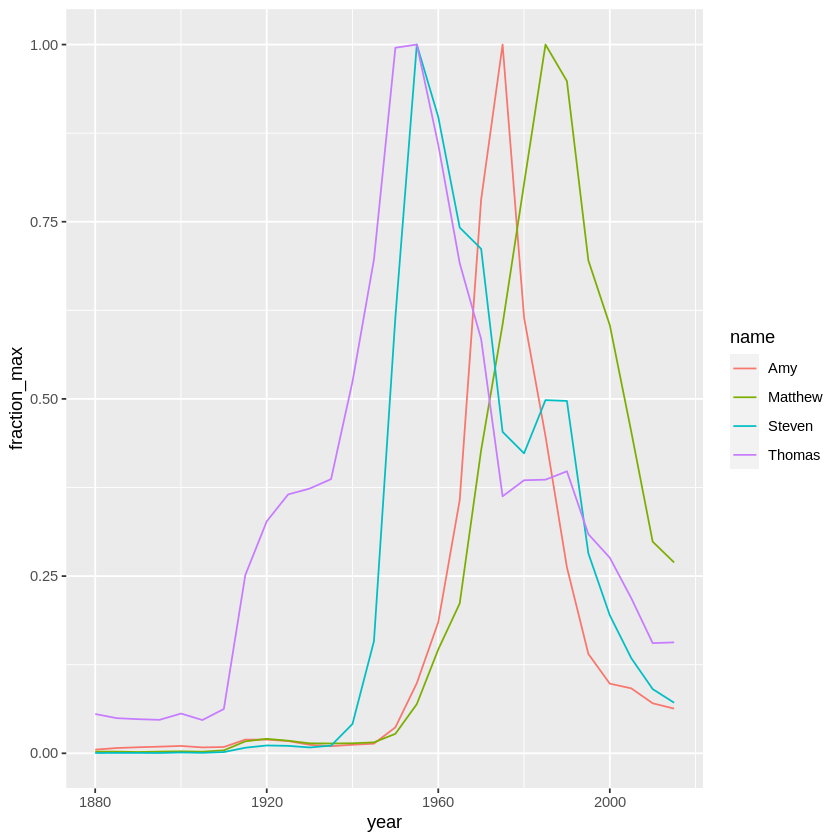

In [37]:
# Filter for the names Steven, Thomas, and Matthew
names_filtered <- names_normalized %>%
  filter(name %in% c("Steven", "Thomas", "Matthew", "Amy"))

# Visualize these names over time
ggplot(names_filtered, aes(x = year, y = fraction_max, color = name)) +
  geom_line()

# Using lag to compare present observation with last

In [52]:
babynames_pct <- babynames %>% 
  group_by(year) %>%
  mutate(total_by_name = sum(number)) %>%
  ungroup() %>%
  mutate(percentage = number/total_by_name*100)

In [54]:
babynames_pct %>%
  # Arrange the data in order of name, then year 
  arrange(name, year) %>%
  # Group the data by name
  group_by(name) %>%
  # Add a ratio column that contains the ratio between each year 
  mutate(ratio = percentage / lag(percentage))

year,name,number,total_by_name,percentage,ratio
<dbl>,<chr>,<int>,<int>,<dbl>,<dbl>
2010,Aaban,9,3672066,0.0002450936,NA
2015,Aaban,15,3648781,0.0004110962,1.6773026
1995,Aadam,6,3652750,0.0001642598,NA
2000,Aadam,6,3767293,0.0001592656,0.9695954
2005,Aadam,6,3828460,0.0001567210,0.9840231
2010,Aadam,7,3672066,0.0001906284,1.2163552
2015,Aadam,22,3648781,0.0006029411,3.1629135
2010,Aadan,11,3672066,0.0002995589,NA
2015,Aadan,10,3648781,0.0002740641,0.9148923
